In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


In [2]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()


Using TensorFlow backend.


11493376/11490434 [==============================] - 0s 0us/step


In [0]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)
x_train = x_train/255
x_test = x_test/255

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.layers import Conv2D, MaxPool2D
from keras.optimizers import Adam

In [0]:
model = Sequential()

In [6]:

model.add(Conv2D(8, (3,3), padding='same', input_shape=(28, 28, 1)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(16, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(24, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))

#Dense層
model.add(Flatten())
model.add(Dense(20)) 
model.add(Activation('relu'))

model.add(Dense(10, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
model.compile(loss="categorical_crossentropy", optimizer=Adam(), metrics=['accuracy'])

In [8]:
model.summary()#檢查模型是否正確

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 8)         80        
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 8)         0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 16)        1168      
_________________________________________________________________
activation_2 (Activation)    (None, 14, 14, 16)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 24)          3480      
__________

In [9]:
train_model = model.fit(x_train, y_train, batch_size=150, epochs=10)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
60000/60000 [==============================] - 29s 477us/step - loss: 0.4892 - acc: 0.8548
Epoch 2/10
60000/60000 [==============================] - 28s 465us/step - loss: 0.1211 - acc: 0.9622
Epoch 3/10
60000/60000 [==============================] - 28s 463us/step - loss: 0.0883 - acc: 0.9725
Epoch 4/10
60000/60000 [==============================] - 28s 463us/step - loss: 0.0709 - acc: 0.9774
Epoch 5/10
60000/60000 [==============================] - 28s 465us/step - loss: 0.0626 - acc: 0.9804
Epoch 6/10
60000/60000 [==============================] - 28s 463us/step - loss: 0.0538 - acc: 0.9830
Epoch 7/10
60000/60000 [==============================] - 28s 463us/step - loss: 0.0480 - acc: 0.9847
Epoch 8/10
60000/60000 [==============================] - 28s 463us/step - loss: 0.0435 - acc: 0.9859
Epoch 9/10
60000/60000 [==============================] - 28s 462us/step - loss: 0.0405 - acc: 0.9875
Epoch 10/10
60000/60000 [=========

In [10]:
score_train = model.evaluate(x_train, y_train, batch_size=400)
score_test = model.evaluate(x_test, y_test, batch_size=400)
print('train_loss:',score_train[0],'train_accuracy:',score_train[1] )
print('test_loss:',score_test[0],'test_accuracy:',score_test[1] )

10000/10000 [==============================] - 2s 199us/step
train_loss: 0.034548732307739555 train_accuracy: 0.9887166774272919
test_loss: 0.04570102446712553 test_accuracy: 0.9864000082015991


<function matplotlib.pyplot.show>

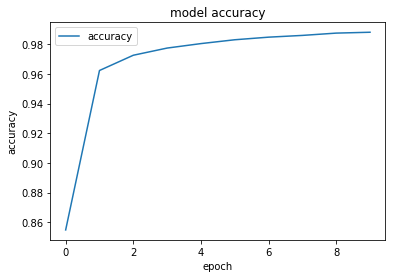

In [11]:
plt.plot(train_model.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(["accuracy"],loc = "best")
plt.show